<a href="https://colab.research.google.com/github/jnegrete85/ContinuousTransitions/blob/main/Dynamical_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A dynamical interpretation of linear relationships in financial assets (draft) #

## Jose Negrete Jr ##

### Instituto de Ciencias Sociales y Administración (ICSA) - Universidad Autónoma de Ciudad Juárez ###

### License: Creative Commons Attribution 4.0 International (CC BY 4.0)
This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).
© 2025 Jose Negrete Jr

<br>


## **1. Introduction** ##

<br>

### Here we investigate different modes of self-organization that might arise between the returns of different assets. Specifically we look for instances where $N$ assets interact with each other, such that each asset is described by an approximate linear relationship with $M$ other assets, of the form ###

<br>

###$$
r^{(n)}_i ≈ \sum^M \theta_m r^{(m)}_i
$$###

<br>

### where $r^{(n)}_i$ is the return of an asset with index $n$ and $i$ is an index for the time step.

<br>

### For example in Figure 1 we show that the prices of the Meta (META) and Netflix (NFLX) stocks are not correlated but the returns are linearly correlated. The aim of this is to understand how linear relationships between assets returns emerge from their interactions. Our ultimate aim is to understand how a lack of divesification emerge in a portfolio and to understand how the signatures of self-organization in the market emerge during [financial panic](https://arxiv.org/abs/0908.0111). ###

<br>

### I am far from my goals, so I start by analyzing a coupled dynamical system described by iterative maps. When the asset returns are uncoupled they have chaotic dynamics and each asset presents different statistical moments. Here we study the effects of a coupling matrix and coupling stength in different modes of self-organization. Specifically, when the system organizes itself in presenting linear relationships between assets. ##

## In this manuscript we discuss the following: ###

<br>

* ### Our mathematical formalism and the arguments behind it. ###
* ### Numerical results ###
* ### Possible applications ###
* ### Conclusions ###

<br>

### All of the code that we have used is below at the end section of this manuscript. ###

<br>

<br>








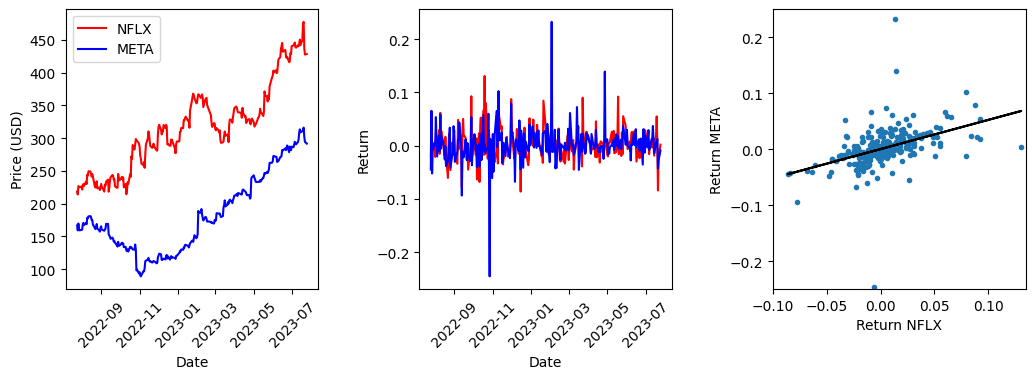

In [ ]:
# @title
plt.figure(figsize=(12, 3.5))
plt.subplot(1,3,1)
plt.plot(Dates,portfolio1[:,5],'-r', label = 'NFLX')
plt.plot(Dates,portfolio1[:,6],'-b', label = 'META')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.subplot(1,3,2)
plt.plot(Dates[1:],portfolio1_return[:,5],'-r')
plt.plot(Dates[1:],portfolio1_return[:,6],'-b')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Return')
plt.subplot(1,3,3)
plt.plot(portfolio1_return[:,5],portfolio1_return[:,6], '.')
plt.plot(portfolio1_return[:,5],0.52*portfolio1_return[:,5], '-k')
plt.xlabel('Return NFLX')
plt.ylabel('Return META')
plt.ylim(-0.25,0.25)
plt.xlim(-0.10,0.25/2+0.01)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

**Figure 1 - Example of two assets which returns are linearly correlated in a noisy fashion.**

## **2. Mathematical formalism** ##

<br>

### Our model consists of a network of coupled iterative maps of the form: ###

<br>

###$$
\vec{r}_{i+1} = \big(I + \epsilon \ C \big) \vec{F}(\vec{r}_i)
$$###

<br>

### where the returns of the assets are given by the vector ###

<br>

###$$
\vec{r}_i = \big[r^{(1)}_i, r^{(2)}_i, r^{(3)}_i, \cdots, r^{(N-1)}_i, r^{(N)}_i \big]
$$###

<br>

### $I$ corresponds to the indentity matrix, $C$ corresponds to the coupling matrix which determines the network connectivity and $\epsilon$ is a coupling strength parameter. The vector

<br>

###$$
\vec{F}(\vec{r}_i) = \big[ F^{(1)}\big(r^{(1)}_i \big),F^{(2)}\big(r^{(2)}_i \big),F^{(3)}\big(r^{(3)}_i \big), \cdots, F^{(N-1)}\big(r^{(N-1)}_i \big), F^{(N)}\big(r^{(N)}_i \big)  \big]
$$###

<br>

### Where each element $F^{(k)} \big(r^{(k)}_i \big)$ correspond to the nonlinear processing that determines the autonomous dynamics ($\epsilon = 0$) of each element $r^{(k)}$. ###

<br>

<br>

### **2.1 The autonomous dynamics $(\epsilon = 0)$** ###

<br>

### When the coupling strength is set to zero $(\epsilon = 0)$, the return of each asset evolves simply as an iterative map of the form ###

<br>

###$$
r^{(k)}_{i+1} =  F^{(k)}\big(r^{(k)}_i \big)
$$###

<br>

### we have chosen $F^{(k)}\big(r^{(k)}_i \big)$ such that the mapping is non-invertible an so its dynamics are **chaotic**. At the same time we would like to have a non-linear term that give us a sequence of $r^{(k)}_i$ with a set of desired statistical properties such as a mean, variance, skewness and kurtosis as desired.  ###

<br>

### To define the mapping given by $F^{(k)}\big(r^{(k)}_i \big)$ we have taken advantage of the **[Probability integral transform](https://https://en.wikipedia.org/wiki/Probability_integral_transform)**. This allow us to map any number $u_i$ given by a uniform probability distribution into any  number $x_i$ with the desired probability distribution $\rho(x_i)$. This is done simply by the mapping ###

<br>

###$$
u_i  = c(x_i)
$$###

<br>

### where $c(x_i)$ is the cumulative distribution function for $x_i$. We have defined $F^{(k)}\big(r^{(k)}_i \big)$ with the following mapping steps: ###

<br>

###$$
u_i  = c \big( r^{(k)}_i \big)
$$###

<br>

###$$
u_{i+1}  = \frac{u_i}{\delta} - int \big( \frac{u_i}{\delta} \big)
$$###

<br>

###$$
r^{(k)}_{i+1} = c^{-1}(u_{i+1})
$$###

<br>

### where $u_{i}$ evolves as a chaotic system which correlation length is controlled $\delta$ and it exhibits a uniform probability distribution function $U \sim [0,1]$.###

<br>

### We have chosen the a cumulative distribution of the form ###

<br>

###$$
c(x) = \frac{2}{\pi}\ tan^{-1} \big(tanh \big(\gamma(x-r_0) \big) \big)
$$###

<br>

### The corresponding probability density function has the form ###

<br>

###$$
\rho(x) = \frac{\gamma}{\pi} sech \big( \gamma (x - r_0) \big)
$$###

### (see Figure 2).  ###

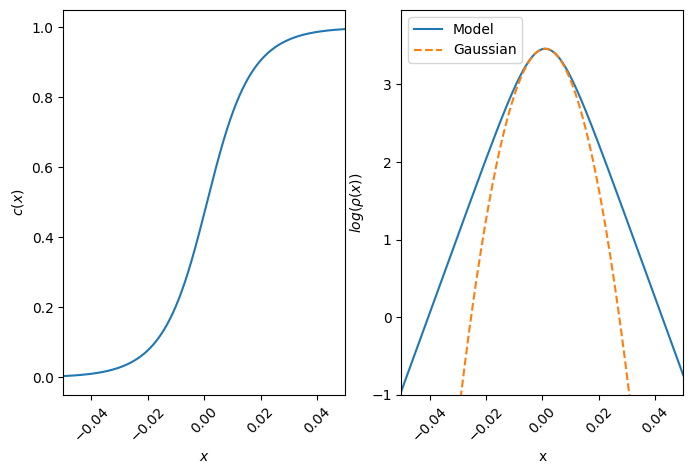

In [ ]:
# @title
gamma = 100
r = 0.001

x = np.arange(-.1,.1,.0001)
c = 2/pi*arctan(tanh(gamma*(x-r)/2)) + 1/2
rho = gamma/pi*1/cosh(gamma*(x-r))
log_pdf = log(gamma/pi) -gamma**2*(x-r)**2/2

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(x,c)
plt.xlabel(r'$x$')
plt.ylabel(r'$c(x)$')
plt.xlim(-0.05,0.05)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
plt.plot(x,np.log(rho), label = 'Model')
plt.plot(x,log_pdf, '--' , label = 'Gaussian')
plt.ylim(-1,max(log_pdf)+0.5)
plt.xlim(-0.05,0.05)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$log(\rho(x))$')
plt.xticks(rotation = 45)
plt.show()

**Figure 2 - Cumulative probability function $c(x)$ (left) and the logarithm of the probability density function $log[\rho(x)]$ (right). Note that our model presents longer tails compared to a Gaussian distribution (dashed line).**

In [ ]:
# @title
np.random.seed(0)
### Parameters ###
realizations = 100000
Initial_r = np.random.uniform(0.0149,0.0151,realizations)
Initial_p = 221.31

### Measurables ###
Mean_r = np.zeros(realizations)
Std_r = np.zeros(realizations)
Skewness_r = np.zeros(realizations)
Kurtosis_r = np.zeros(realizations)

### Iterative loop ###
for i in range(realizations):
  single_instance = SingleSimulation(Initial_r[i], Initial_p)
  r, p = single_instance.simulate()
  Mean_r[i] = np.mean(r)
  Std_r[i] = np.std(r)
  Skewness_r[i] = skew(r)
  Kurtosis_r[i] = kurtosis(r, fisher = True)


### It is well known that convergence to the mean is slow when dealing with systems with kurtosis (see the book [Statistical consequences of fat tails](https://arxiv.org/abs/2001.10488)), and so I expect in the model wide distribution of sample mean, variance, skewness and escess kurtosis. In Figure 3, we show the obtained distribution with fixed parameters and samples of 251 days (iterations). ###

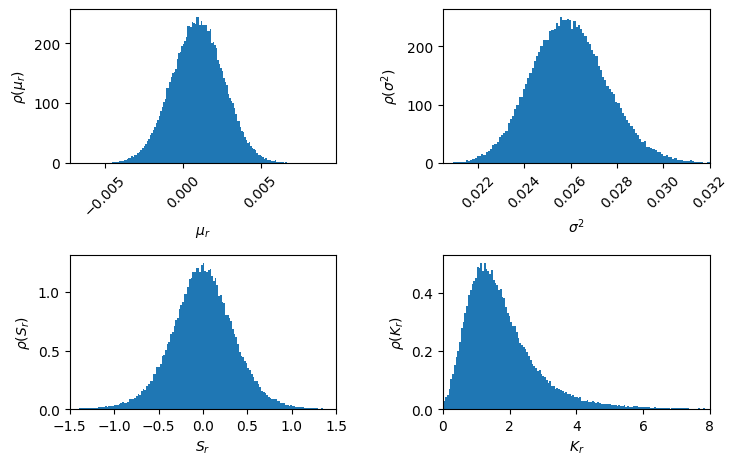

In [ ]:
# @title
plt.figure(figsize = (8,5))
plt.subplot(2,2,1)
plt.hist(Mean_r, bins = 'fd', density = 'True')
plt.xlabel(r'$\mu_r$')
plt.ylabel(r'$\rho(\mu_r)$')
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
plt.hist(Std_r, bins = 'fd', density = 'True')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$\rho(\sigma^2)$')
plt.xticks(rotation = 45)
plt.xlim(0.0205,0.032)
plt.subplot(2,2,3)
plt.hist(Skewness_r, bins = 'fd', density = 'True')
plt.xlabel(r'$S_r$')
plt.ylabel(r'$\rho(S_r)$')
plt.xlim(-1.5,1.5)
plt.subplot(2,2,4)
plt.hist(Kurtosis_r, bins = 'fd', density = 'True')
plt.xlabel(r'$K_r$')
plt.ylabel(r'$\rho(K_r)$')
plt.xlim(0,8)



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6)

plt.show()

**Figure 3 - Distribution of the sample mean $\mu_r$ (upper left), the sample standard deviation $\sigma_r$ (upper right), the sample skew (lower left) and the sample excess kurtosis (lower right). The model parameters are set to $\gamma = 60$, $r_0 = 0.001$ and $\delta = 0.011$.**


<br>

### Note that there is significant variation in simulations, and specifically that the mean returns and variance differ by one order of magnitude. In Figure 4 I show that our model reprduces properties observed in real stocks returns as we see similarities between one realization and the values observed for the Netflix stock (25/07/2022 - 25/07/2023). ###

<br>

<ipython-input-2-535044484164>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.r[0] = initial_r # Random initial conditions


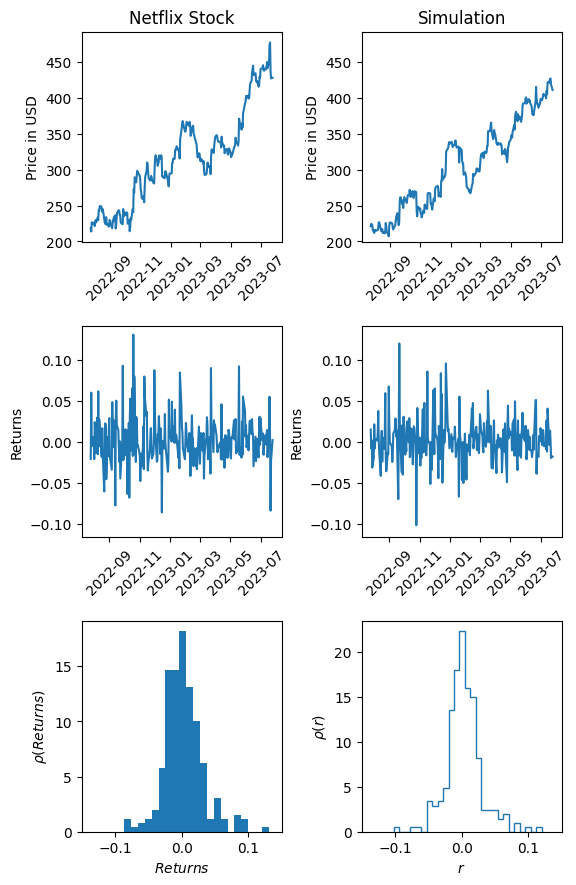

In [ ]:
# @title
### Parameters fitted to Netflix ###
np.random.seed(3)
Initial_r = np.random.uniform(0.0149,0.0151,1)
Initial_p = 221.31

single_instance = SingleSimulation(Initial_r, Initial_p)
r, p = single_instance.simulate()
bins, histogram = single_instance.PDF() #r_axis, probability_dist,


plt.figure(figsize=(6,10))
plt.subplot(3,2,1)
plt.plot(Dates,portfolio1[:,5])
plt.ylim(np.min(portfolio1[:,5])-15,np.max(portfolio1[:,5])+15)
plt.ylabel('Price in USD')
plt.title('Netflix Stock')
plt.xticks(rotation=45)
plt.subplot(3,2,2)
plt.plot(Dates, p)
plt.ylim(np.min(portfolio1[:,5])-15,np.max(portfolio1[:,5])+15)
plt.ylabel('Price in USD')
plt.title('Simulation')
plt.xticks(rotation=45)
plt.subplot(3,2,3)
plt.plot(Dates[1:], portfolio1_return[:,5])
plt.ylim(np.min(portfolio1_return[:,5])-0.03,np.max(portfolio1_return[:,5])+0.01)
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.subplot(3,2,4)
plt.plot(Dates[1:],r[:250])
plt.ylim(np.min(portfolio1_return[:,5])-0.03,np.max(portfolio1_return[:,5])+0.01)
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.subplot(3,2,5)
plt.hist(portfolio1_return[:,5], bins = 'fd', density = 'True')
plt.xlim(-0.15,0.15)
# plt.ylim(0,np.max(probability_dist)+1)
plt.xlabel(r'$Returns$')
plt.ylabel(r'$\rho(Returns)$')
plt.subplot(3,2,6)
plt.stairs(histogram,bins, label = 'numerical')
# plt.plot(r_axis,probability_dist,'-r', label = 'analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$\rho(r)$')
plt.xlim(-0.15,0.15)
# plt.ylim(0,np.max(probability_dist)+1)
# plt.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()



**Figure 4 - Specific realization from the model exhibiting a similar trajectory to the price and return time traces, and the return distribution for the NFLX stock.**

<br>

### By comparing between the dynamics of probability distribution of the real stock and our simulations we can see that several features are reproduced. Therefore, our model allow us to reproduce realistic features and also to reproduce the variability observed between stocks that have different statistical moments. ###

<br>

<br>

### **2.2 The coupled system $(\epsilon > 0)$** ###

<br>

### As mentioned in the introduction, we would like to reveal the conditions in which assets self-organize into having a linear relationship between each other. In this work we have tested how the properties of the coupling matrix $C$, sets the type of linear relationships between different assets. ###

<br>

### I will mentioned the steps that I used to set the properties of the coupling matrix $C$. Suppose that initially our model is given a by a set of coupled ordinary differential equations of the form ###

<br>

###$$
\frac{d \vec{x}}{dt} = \vec{f}(\vec{x}) + \epsilon \ C \ \vec{x}
$$###

<br>

### where $\vec{f}(\vec{x})$ sets the autonomous dynamics. Lets assume initially that $\vec{f}(\vec{x}) = 0$, and we would like to find the equilibria $\vec{x}$. We must solve the equation

<br>

###$$
C \ \vec{x} = 0
$$###

<br>

### if $C$ is composed of only linearly independent vectors they will span the whole space, and a single solution exists $\vec{x} = 0$.

<br>

### Interesting features are observed when $C$ is composed of linearly dependent vectors. As I show in the figure below, a continuum of equilibrium points emerge orthogonally from the vectors set by the coupling matrix $C$. ###

<br>

<br>

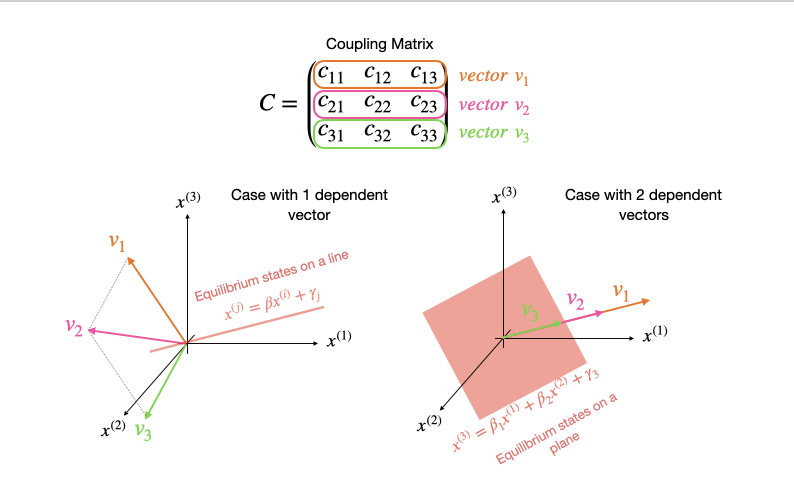

**Figure 5 - The relationship between the number of independent vectors in the coupling matrix and the dimension of the attracting manifolds. Systems self organizing in manifold like this will exhibit a linear relationship.**

<br>

### In the figure above we see cases where the relationship  $C \ \vec{x} = 0$ by a continuum of points. If there is one dependent vector, there will be an equillibrium of dimension $D = 1$, and if there are two dependent vectors then $D = 2$, and so on in spaces of arbitrary dimension. Does this mean that the equillibria shown above are stable? Not necessarily. In the cases with $D$ linearly dependent vectors in the the coupling matrix will result in $D$ eigenvalues with$\lambda_n = 0$. For the equillibria to be stable, then the rest of the eigenvalues must be $\lambda_n < 0$. ###

<br>

### Now we can ask what will be the effects of $C$ when $\vec{f}(\vec{x}) \neq 0$. In the well documented case of $C$ being a diffusive coupling, the system $\vec{x}$ tends to uniformity (see for example the classical cases of [trigger waves](https://www.nature.com/articles/s41576-021-00355-7) and [ synchronized oscillators](https://doi.org/10.1017/CBO9780511755743)). Finally, lets suppose that $\vec{r}_n$ is a Poincaré mapping of $\vec{x}$, then

<br>

###$$
\frac{d \vec{x}}{dt} = \vec{f}(\vec{x}) \ \rightarrow \ \vec{r}_{n+1} = \vec{F}(\vec{r}_n)
$$###

<br>

### As shown in [Yamada and Fujisaka (1983)](https://academic.oup.com/ptp/article/70/5/1240/1940568) and as it is in standard practice with an [intermediate step](http://www.scholarpedia.org/article/Coupled_maps), the mapping of the coupled ODE systems to coupled iterative maps is given by ###

<br>

###$$
\frac{d \vec{x}}{dt} = \vec{f}(\vec{x}) + \epsilon \ C \vec{x} \ \rightarrow \ \vec{r}_{n+1} = (I + \epsilon \ C ) \vec{F}(\vec{r}_n)
$$###

<br>

### and so I study how the properties of $C$ (i.e. the number $D$ of linearly dependent vectors) set the the equillibria for $\vec{r}_n$.

<br>

<br>

## **3. Numerical results** ##

<br>

### In this section I simulate networks with $N = 30$ components. I set the number $D$ at each particlar case and it corresponds to the number of eigenvalues with $\lambda_n = 0$ in $C$. I call $D$ the expected dimension, as it belongs to the dimension of the desired attracting manifold.###
<br>

### The coupling matrix is created at each trial exploiting the relation $C = V^T \Lambda V$, where $\Lambda$ is a diagonal matrix containing its eigenvalues and $V$ the matrix containing its eigenvectors. The matrix $V$ is created initially from a random matrix $R$, which entries are obtained from a uniform distribution $U~[-1,1]$. Subsequently $V$ is obtained by ortohogonalizing $R$ via a Gramm-Schmidt process. ###

<br>

### In each simulations I set the parameters $\alpha$, $\beta$ that correspond to each $r^{(k)}_n$ randomly by drawing them respecctively from uniform distributions $U_{\alpha}\sim[150,250]$ and $U_{\beta} \sim [0.1,1.8]$ respectively. I set $r_0$ such that the mean value of $r^{(k)}$ falls within a random value between $U_{\mu} \sim [0.001, 0.005]$.###

<br>

### Finally, we simulate two systems simultaneously. A reference uncoupled system with $\epsilon = 0$, and the coupled system with $\epsilon > 0$. We perform 250 iterations of each system. ###

<br>

### **3.1 Detection of dimension $\hat{D}$** ###

<br>

### The figure below shows a sample of price trajectories for three different cases: $D=1$, $D=3$ and $D=4$ for $\epsilon = 0.9$. These trajectories were created using the same random seed, therefore we can see how the details of the coupling matrix give rise to different dynamics. ###





In [ ]:
# @title
epsilon = 0.43
N = 30
instance_1 = NetworkSimulation(N,1,epsilon)
instance_3 = NetworkSimulation(N,3,epsilon)
instance_4 = NetworkSimulation(N,4,epsilon)

np.random.seed(2)
r1,p1, r_ref1 = instance_1.simulate()
y1, ypred1, spearman1 = instance_1.LinearRegression()
np.random.seed(2)
r3,p3, r_ref3 = instance_3.simulate()
y3, ypred3, spearman3 = instance_3.LinearRegression()
np.random.seed(2)
r4,p4, r_ref4 = instance_4.simulate()
y4, ypred4, spearman4 = instance_4.LinearRegression()

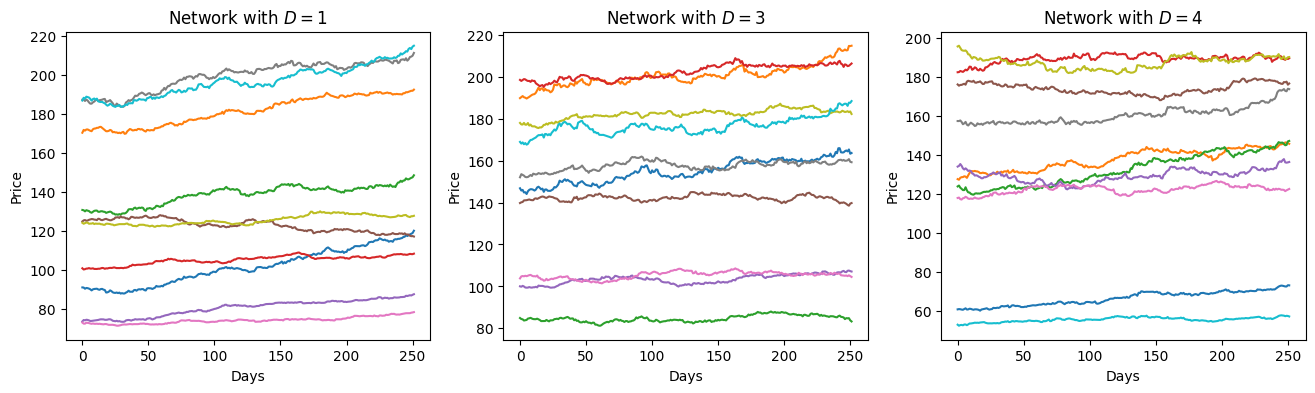

In [ ]:
# @title
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(p1[0:10,:].T)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Network with $D = 1$')
plt.subplot(1,3,2)
plt.plot(p3[0:10,:].T)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Network with $D = 3$')
plt.subplot(1,3,3)
plt.plot(p4[0:10,:].T)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Network with $D = 4$')
plt.show()


**Figure 6 - 10 sample prices obtained from simulating a network of $N = 30$ assets.**

<br>

### Here I would like to see if indeed the returns are self-organizing in attractors with the expected dimension $D$. If this is true then the return trajectories must be related to each other approximately by a linear relationship. I have taken the first asset of the network and performed a linear regression to infer the parameters $\hat{\theta}_n$###

<br>

###$$
\hat{r}^{(1)} = \sum_{n=2}^{D+1} \hat{\theta} r^{(n)}
$$###

<br>

### The figure below in the first column the returns $r^{(1)}$ are shown, along with the signals used for the linear regression. In this work I have used normalized signals for the linear regression. We can see that the regression and the original signal follow each other. At the same time we can see that the accuracy is not 100%, and there is extra noise on top of the linear relation.###

<br>



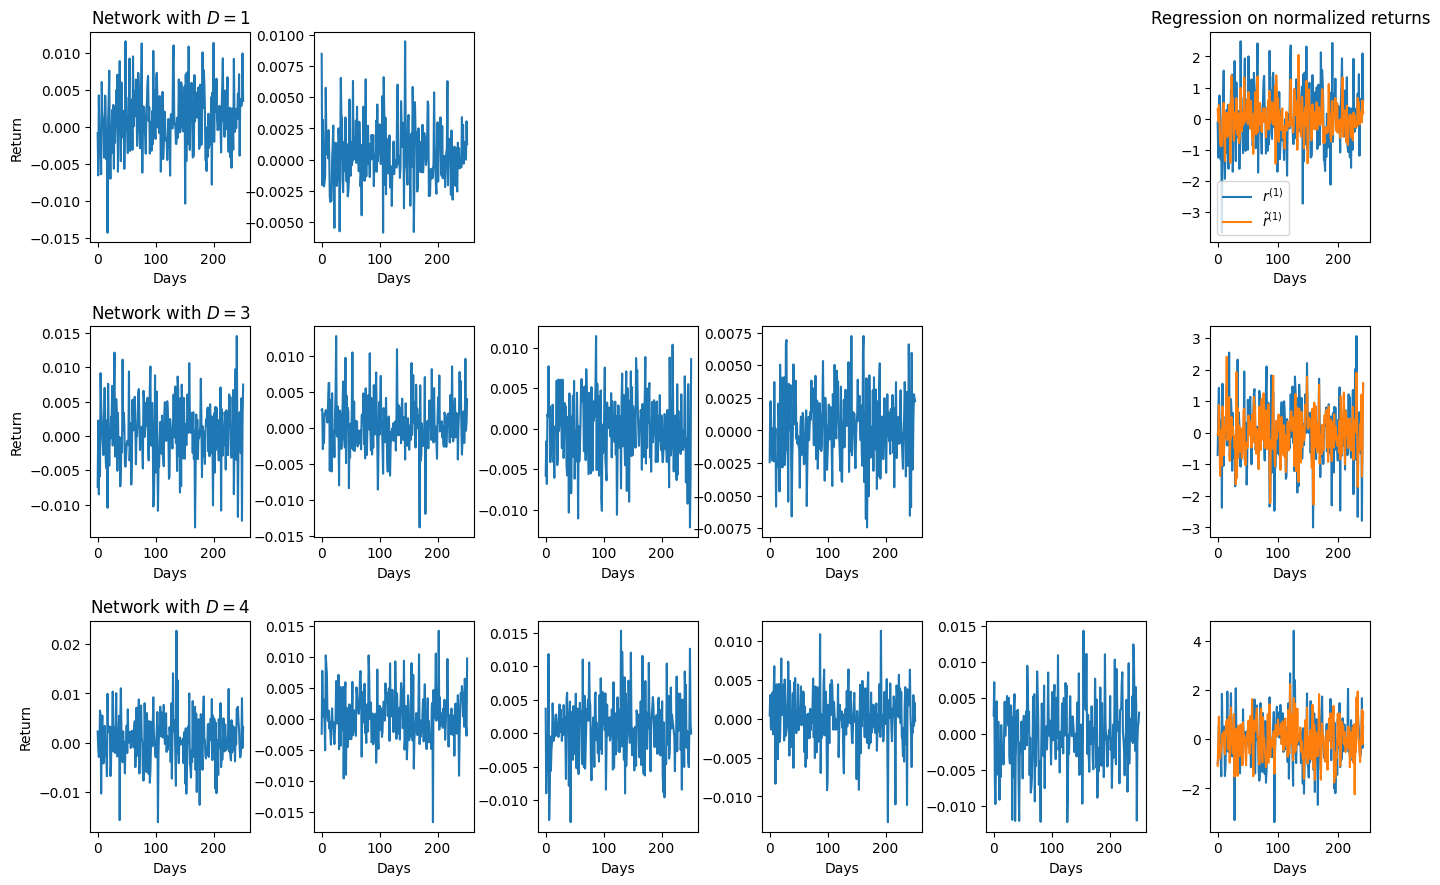

In [ ]:
# @title
plt.figure(figsize=(16,10))
plt.subplot(3,6,1)
plt.plot(r1[0,:])
plt.ylabel('Return')
plt.xlabel('Days')
plt.title('Network with $D = 1$')
plt.subplot(3,6,2)
plt.plot(r1[1,:])
plt.xlabel('Days')
plt.subplot(3,6,6)
plt.plot(y1,label = r'$r^{(1)}$')
plt.plot(ypred1, label = r'$\hat{r}^{(1)}$')
plt.title('Regression on normalized returns')
plt.xlabel('Days')
plt.legend()
plt.subplot(3,6,7)
plt.plot(r3[0,:])
plt.title('Network with $D = 3$')
plt.ylabel('Return')
plt.xlabel('Days')
plt.subplot(3,6,8)
plt.plot(r3[1,:])
plt.xlabel('Days')
plt.subplot(3,6,9)
plt.plot(r3[2,:])
plt.xlabel('Days')
plt.subplot(3,6,10)
plt.plot(r3[3,:])
plt.xlabel('Days')
plt.subplot(3,6,12)
plt.plot(y3,label = r'$r^{(1)}$')
plt.plot(ypred3, label = r'$\hat{r}^{(1)}$')
plt.xlabel('Days')
plt.subplot(3,6,13)
plt.plot(r4[0,:])
plt.title('Network with $D = 4$')
plt.ylabel('Return')
plt.xlabel('Days')
plt.subplot(3,6,14)
plt.plot(r4[1,:])
plt.xlabel('Days')
plt.subplot(3,6,15)
plt.plot(r4[2,:])
plt.xlabel('Days')
plt.subplot(3,6,16)
plt.plot(r4[3,:])
plt.xlabel('Days')
plt.subplot(3,6,17)
plt.plot(r4[4,:])
plt.xlabel('Days')
plt.subplot(3,6,18)
plt.plot(y4,label = r'$r^{(1)}$')
plt.plot(ypred4, label = r'$\hat{r}^{(1)}$')
plt.xlabel('Days')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()



**Figure 7 - Examples of returns obtained from different simulations. The last column shows the normalized signal shown in the first column along with the predictions of a linear regression. The signals shoown in the rows were used for the regression.**

<br>

### Here I sought for a signature such that we can extract the dimensionality of the manifold from the observations. I realized there is a visible signature in the eigenvalues $\lambda^{(P)}_n$ obtained from principal component analysis. ###

<br>

### In figure 7 we see the eigenvalue spectra for both the reference uncoupled system $\phi_{U}(\lambda^{(P)}_n)$ and the coupled system $\phi_{C}(\lambda^{(P)}_n)$ (i.e. with  $\epsilon = 0.9$). We can see that the coupled system shows eigenvalues that strongly highly deviate from the reference spectra. I concluded that the values that fulfill $\phi_{C}(\lambda^{(P)}_n) > \phi_{U}(\lambda^{(P)}_n)$ closely reflect the dimensionality of the manifold. ###

<br>

### Therefore I have decided to define a value $\hat{D}$ for the detected (or inferred) dimension. This is given by ###

<br>

###$$
\hat{D} = \sum_{n=1}^N H \big(\phi_{C}(\lambda^{(P)}_n) - \phi_{U}(\lambda^{(P)}_n) \big)
$$###

<br>

### where $H(\cdot)$ correspond to the heaviside step function. Note in figure 7 that for $D = 1$ there is an eigenvalue that deviates strongly from the reference and another that deviates weakly. We take the strong deviation as signature of the dimension of the manifold. Yet, in this specific case the inferred dimension would be $\hat{D} = 2$. Despite this innacuracy, I decided that the definition of $\hat{D}$ is the simplest criteria since it has no external parameters.

<br>

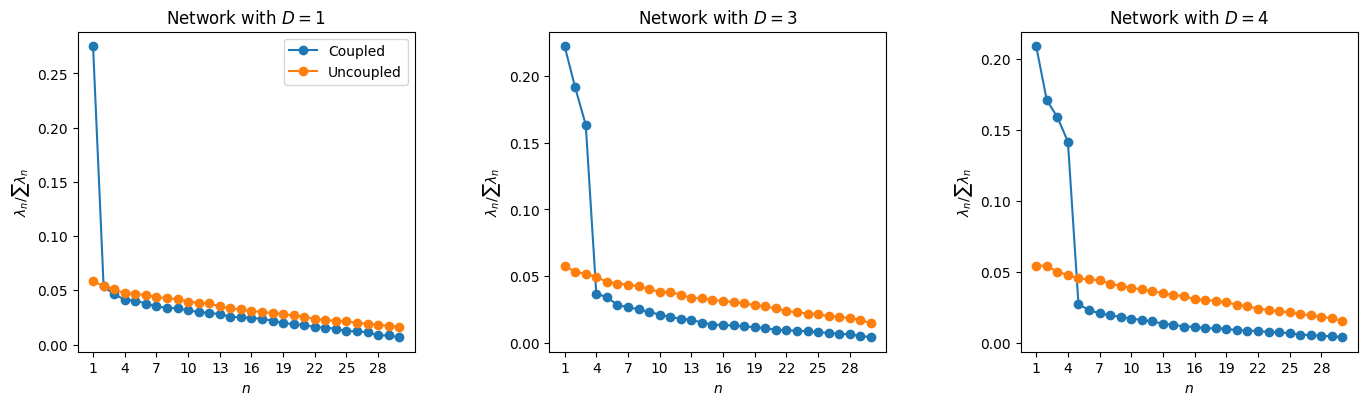

In [ ]:
# @title
ev1, ev1_reference = instance_1.PCA()
ev3, ev3_reference = instance_3.PCA()
ev4, ev4_reference = instance_4.PCA()

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(np.arange(1,N+1),ev1/np.sum(ev1),'-o', label = 'Coupled')
plt.plot(np.arange(1,N+1),ev1_reference/np.sum(ev1_reference),'-o', label = 'Uncoupled')
plt.legend()
plt.xticks(np.arange(1,N+1,3))
plt.xlabel(r'$n$')
plt.ylabel(r'$\lambda_n/\sum \lambda_n$')
plt.title('Network with $D = 1$')
plt.subplot(1,3,2)
plt.plot(np.arange(1,N+1),ev3/np.sum(ev3),'-o')
plt.plot(np.arange(1,N+1),ev3_reference/np.sum(ev3_reference),'-o')
plt.xticks(np.arange(1,N+1,3))
plt.xlabel(r'$n$')
plt.ylabel(r'$\lambda_n/\sum \lambda_n$')
plt.title('Network with $D = 3$')
plt.subplot(1,3,3)
plt.plot(np.arange(1,N+1),ev4/np.sum(ev4),'-o')
plt.plot(np.arange(1,N+1),ev4_reference/np.sum(ev4_reference),'-o')
plt.xticks(np.arange(1,N+1,3))
plt.xlabel(r'$n$')
plt.ylabel(r'$\lambda_n/\sum \lambda_n$')
plt.title('Network with $D = 4$')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

**Figure 8 - Spectra of the eigenvalues obtained from principal component analysis (PCA). I interpret the spectra as a reflection of the diemnsionality of the system.**

<br>

### **3.2 Dependence with coupling strength $\epsilon$** ###

<br>

### Here I explore how different features in the model vary against the parameter value $\epsilon$. Here I explored different values: the detected dimension $\hat{D}$, which I defined above. The manifold and noise variance of the normalized signals. The manifold and noise variance is defined as

<br>

###$$
\sigma^2_{manifold} = \sum_{n = 1}^{\hat{D}}\lambda_n^{(P)}
$$###

###$$
\sigma^2_{noise} = 1 -  \sum_{n = 1}^{\hat{D}}\lambda_n^{(P)}
$$###

<br>

### And the Spearmann correlation on between $r^{(1)}$ and the prediction by linear regression $\hat{r}^{(1)}$. ###

<br>

### For each parameter value of $\epsilon$, I did 20 numerical relizations to obtain statistics on each of the parameters measured. We have obtained the following interesting observations: Figure 8 shows the case where the expected dimension $D=1$ from the coupling matrix $C$. We can see that as $\epsilon$ increases, the $\hat{D}$ starts to converge towards its expected value, yet it never reaches with certainty $\hat{D} =1$. At the same time we can see that the manifold variance increases with $\epsilon$ along with the Spearman correlation.  It seems that in this case the system struglles to self-organize around a manifold of dimension $D=1$. We can see that in the final manifold variance value and in the mean and variance of the Spearmann correlation around the highest value for $\epsilon$.  

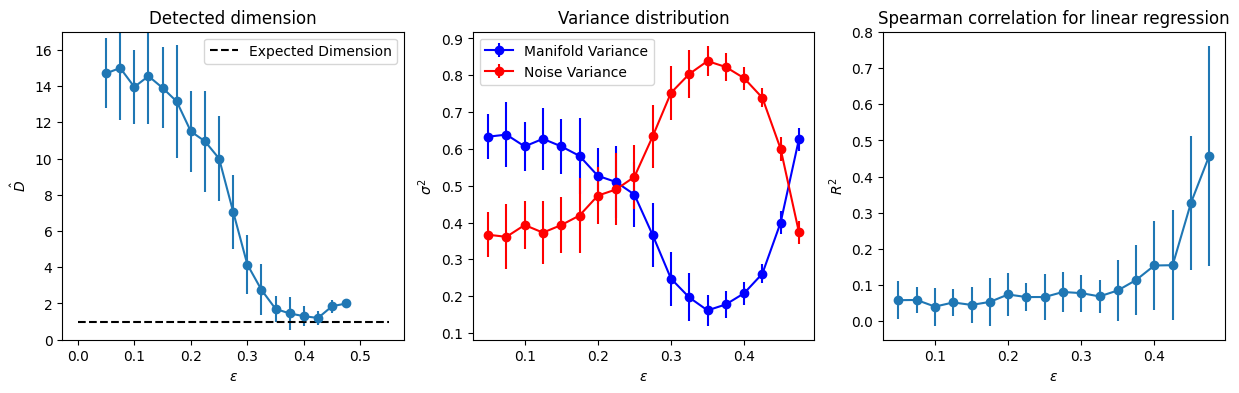

In [ ]:
# @title
# Parameters #
np.random.seed(1)
N = 30
D = 1
repetitions = 20
epsilon = np.arange(0.05,0.5,0.025)

## Parameters to measure ##
observed_hist = np.zeros((N,repetitions))
spearman_repeated  = np.zeros(repetitions)
detected_dimension = np.zeros(repetitions)
percent_variance_manifold = np.zeros(repetitions)
percent_variance_noise = np.zeros(repetitions)
spearman_mean = np.zeros(len(epsilon))
spearman_std = np.zeros(len(epsilon))
detected_dimension_mean = np.zeros(len(epsilon))
detected_dimension_std = np.zeros(len(epsilon))
percent_variance_manifold_mean = np.zeros(len(epsilon))
percent_variance_manifold_std = np.zeros(len(epsilon))
percent_variance_noise_mean = np.zeros(len(epsilon))
percent_variance_noise_std = np.zeros(len(epsilon))


# Iterations #
for j in range(0,len(epsilon)):
  for i in range(0,repetitions):
    instance = NetworkSimulation(N,D,epsilon[j])
    instance.simulate()
    instance.PCA()
    y, y_pred, spearman_repeated[i] = instance.LinearRegression()
    detected_dimension[i], percent_variance_manifold[i] = instance.Dimension_detection()
    percent_variance_noise[i] = 1 - percent_variance_manifold[i]
  detected_dimension_mean[j] = np.mean(detected_dimension)
  detected_dimension_std[j] = np.std(detected_dimension)
  percent_variance_manifold_mean[j] = np.mean(percent_variance_manifold)
  percent_variance_manifold_std[j] = np.std(percent_variance_manifold)
  percent_variance_noise_mean[j] = np.mean(percent_variance_noise)
  percent_variance_noise_std[j] = np.std(percent_variance_noise)
  spearman_mean[j] = np.mean(spearman_repeated)
  spearman_std[j] = np.std(spearman_repeated)


## Plots ##

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.errorbar(epsilon,detected_dimension_mean, yerr=detected_dimension_std, fmt='-o')
plt.plot([0,0.55],[D,D],'--k', label = 'Expected Dimension')
plt.ylim(0,17)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\hat{D}$')
plt.legend()
plt.title(r'Detected dimension')
plt.subplot(1,3,2)
plt.errorbar(epsilon,percent_variance_manifold_mean, yerr=percent_variance_manifold_std, fmt='-ob',label = 'Manifold Variance' )
plt.errorbar(epsilon,percent_variance_noise_mean, yerr=percent_variance_noise_std, fmt='-or',label = 'Noise Variance')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sigma^2$')
plt.title(r'Variance distribution')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(epsilon,spearman_mean, yerr=spearman_std, fmt='-o')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$R^2$')
plt.title(r'Spearman correlation for linear regression')
plt.savefig('Dimension_detection_1.png')
plt.show()


**Figure 9 - Coupling strength versus detected dimension, variance distribution and Spearman correlation for $D=1$ case.**

<br>

### On the other hand in figure 9 and 10 we show the results for $D = 4$ and $D = 10$ respectively. I see that the $\hat{D}$ converges in a clear manner towards $D$ with a significant reduction in the error bars. We see that at high values of $\epsilon$ the manifold variance dominates and the spearmann correlation values are high. From this I conclude that indeed the coupling matrix determines the dimensionality of the attracting manifold. ###

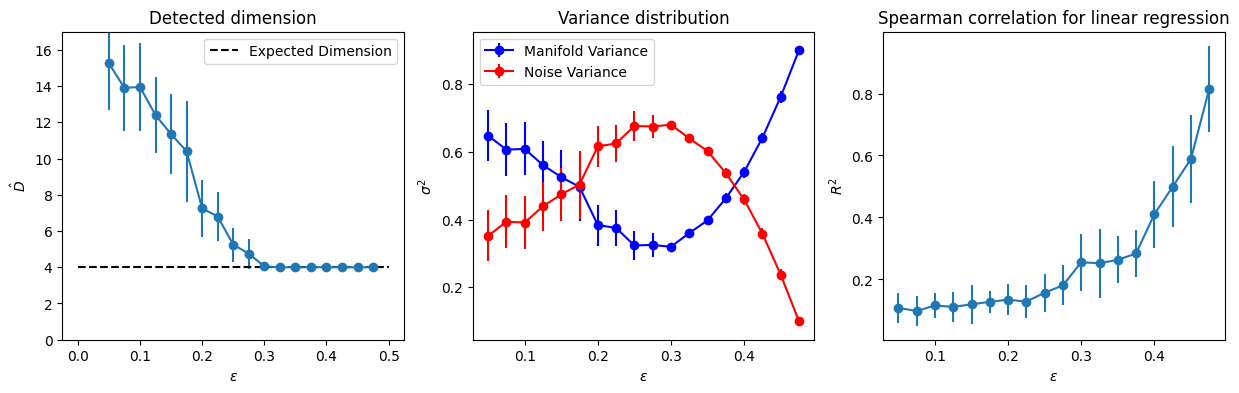

In [ ]:
# @title
# Parameters #
np.random.seed(1)
N = 30
D = 4
repetitions = 20
epsilon = np.arange(0.05,0.5,0.025)

## Parameters to measure ##
observed_hist = np.zeros((N,repetitions))
spearman_repeated  = np.zeros(repetitions)
detected_dimension = np.zeros(repetitions)
percent_variance_manifold = np.zeros(repetitions)
percent_variance_noise = np.zeros(repetitions)
spearman_mean = np.zeros(len(epsilon))
spearman_std = np.zeros(len(epsilon))
detected_dimension_mean = np.zeros(len(epsilon))
detected_dimension_std = np.zeros(len(epsilon))
percent_variance_manifold_mean = np.zeros(len(epsilon))
percent_variance_manifold_std = np.zeros(len(epsilon))
percent_variance_noise_mean = np.zeros(len(epsilon))
percent_variance_noise_std = np.zeros(len(epsilon))


# Iterations #
for j in range(0,len(epsilon)):
  for i in range(0,repetitions):
    instance = NetworkSimulation(N,D,epsilon[j])
    instance.simulate()
    instance.PCA()
    y, y_pred, spearman_repeated[i] = instance.LinearRegression()
    detected_dimension[i], percent_variance_manifold[i] = instance.Dimension_detection()
    percent_variance_noise[i] = 1 - percent_variance_manifold[i]
  detected_dimension_mean[j] = np.mean(detected_dimension)
  detected_dimension_std[j] = np.std(detected_dimension)
  percent_variance_manifold_mean[j] = np.mean(percent_variance_manifold)
  percent_variance_manifold_std[j] = np.std(percent_variance_manifold)
  percent_variance_noise_mean[j] = np.mean(percent_variance_noise)
  percent_variance_noise_std[j] = np.std(percent_variance_noise)
  spearman_mean[j] = np.mean(spearman_repeated)
  spearman_std[j] = np.std(spearman_repeated)


## Plots ##

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.errorbar(epsilon,detected_dimension_mean, yerr=detected_dimension_std, fmt='-o')
plt.plot([0,0.55],[D,D],'--k', label = 'Expected Dimension')
plt.ylim(0,17)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\hat{D}$')
plt.legend()
plt.title(r'Detected dimension')
plt.subplot(1,3,2)
plt.errorbar(epsilon,percent_variance_manifold_mean, yerr=percent_variance_manifold_std, fmt='-ob',label = 'Manifold Variance' )
plt.errorbar(epsilon,percent_variance_noise_mean, yerr=percent_variance_noise_std, fmt='-or',label = 'Noise Variance')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sigma^2$')
plt.title(r'Variance distribution')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(epsilon,spearman_mean, yerr=spearman_std, fmt='-o')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$R^2$')
plt.title(r'Spearman correlation for linear regression')
plt.savefig('Dimension_detection_4.png')
plt.show()

**Figure 10 - Coupling strength versus detected dimension, variance distribution and Spearman correlation for $D=4$ case.**

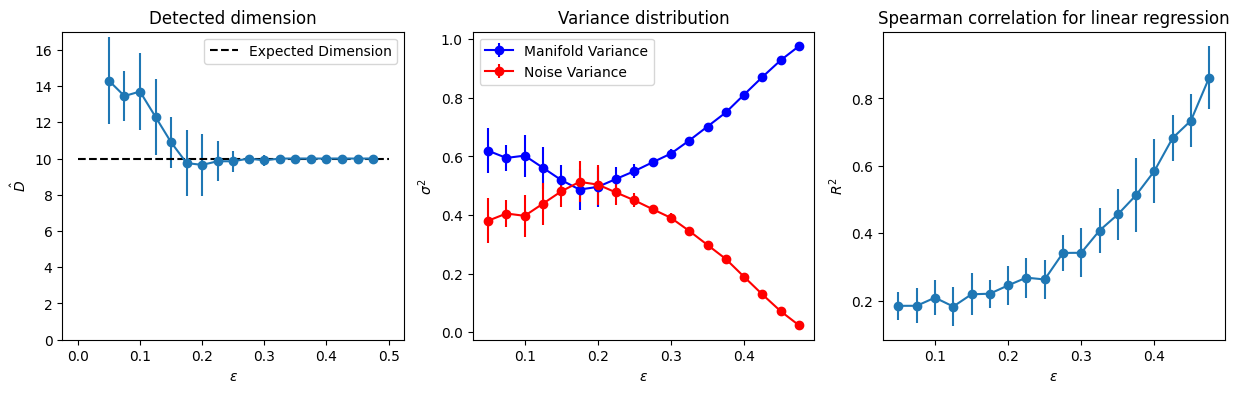

In [ ]:
# @title
# Parameters #
np.random.seed(1)
N = 30
D = 10
repetitions = 20
epsilon = np.arange(0.05,0.5,0.025)

## Parameters to measure ##
observed_hist = np.zeros((N,repetitions))
spearman_repeated  = np.zeros(repetitions)
detected_dimension = np.zeros(repetitions)
percent_variance_manifold = np.zeros(repetitions)
percent_variance_noise = np.zeros(repetitions)
spearman_mean = np.zeros(len(epsilon))
spearman_std = np.zeros(len(epsilon))
detected_dimension_mean = np.zeros(len(epsilon))
detected_dimension_std = np.zeros(len(epsilon))
percent_variance_manifold_mean = np.zeros(len(epsilon))
percent_variance_manifold_std = np.zeros(len(epsilon))
percent_variance_noise_mean = np.zeros(len(epsilon))
percent_variance_noise_std = np.zeros(len(epsilon))


# Iterations #
for j in range(0,len(epsilon)):
  for i in range(0,repetitions):
    instance = NetworkSimulation(N,D,epsilon[j])
    instance.simulate()
    instance.PCA()
    y, y_pred, spearman_repeated[i] = instance.LinearRegression()
    detected_dimension[i], percent_variance_manifold[i] = instance.Dimension_detection()
    percent_variance_noise[i] = 1 - percent_variance_manifold[i]
  detected_dimension_mean[j] = np.mean(detected_dimension)
  detected_dimension_std[j] = np.std(detected_dimension)
  percent_variance_manifold_mean[j] = np.mean(percent_variance_manifold)
  percent_variance_manifold_std[j] = np.std(percent_variance_manifold)
  percent_variance_noise_mean[j] = np.mean(percent_variance_noise)
  percent_variance_noise_std[j] = np.std(percent_variance_noise)
  spearman_mean[j] = np.mean(spearman_repeated)
  spearman_std[j] = np.std(spearman_repeated)


## Plots ##

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.errorbar(epsilon,detected_dimension_mean, yerr=detected_dimension_std, fmt='-o')
plt.plot([0,0.55],[D,D],'--k', label = 'Expected Dimension')
plt.ylim(0,17)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\hat{D}$')
plt.legend()
plt.title(r'Detected dimension')
plt.subplot(1,3,2)
plt.errorbar(epsilon,percent_variance_manifold_mean, yerr=percent_variance_manifold_std, fmt='-ob',label = 'Manifold Variance' )
plt.errorbar(epsilon,percent_variance_noise_mean, yerr=percent_variance_noise_std, fmt='-or',label = 'Noise Variance')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sigma^2$')
plt.title(r'Variance distribution')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(epsilon,spearman_mean, yerr=spearman_std, fmt='-o')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$R^2$')
plt.title(r'Spearman correlation for linear regression')
plt.savefig('Dimension_detection_4.png')
plt.show()

**Figure 11- Coupling strength versus detected dimension, variance distribution and Spearman correlation for $D=10$ case.**

<br>



<br>

## **4. Comparison with real assets** ##

<br>

### Our model suggest a possible mechanism explaing how different linear relationships between assets might arise. Here we ask, if any of the observed features are actually observed in market returns. ###

<br>

### To test my idea, I have collected the return values for the Dow Jones industrial average, S&P 500 and NASDAQ indexes. Along with the returns from Apple (AAPL), Nvidia (NVDA), Netflix (NFLX), Meta (META), Novo Nordisk (NVO), Baker Hughes(BKR) and Bank of America (BAC). From these returns I have calculated the eigenvalue spectra from PCA.###

<br>

### I have obtained the spectra for the returns spanning the dates 25/07/2020 to 25/07/2021 and 25/07/2022 to 25/07/2023. Figure 11 shows these spectra along with fitted realizations. The spectra for the returns from 25/07/2020 to 25/07/2021 and 25/07/2022 matches the spectra for a manifold of $D = 2$ with $\epsilon \simeq 0.46$, while for the other spectra it matches $D = 1$ with $\epsilon \simeq 0.44$. ###

<br>

### Although these results are interesting, we have to be particularly careful. This fit was performed for a single random seed, most likely this reflects an overfit. Yet, the point of Figure 11 is to show that market returns actually show features that can be observe in simulation. I conclude that the model proposed here shows a plausible mechanism on how the markets self organize. ###

<br>



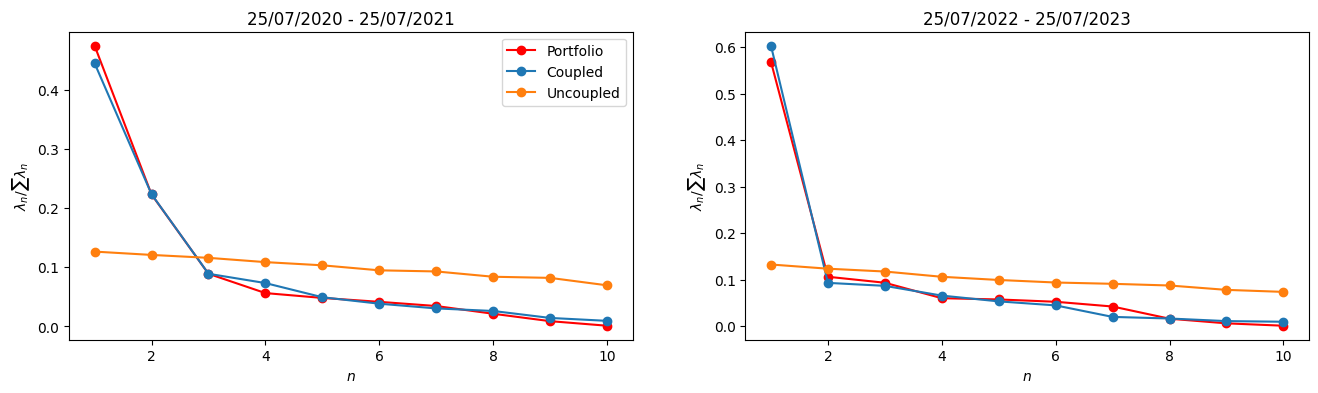

In [ ]:
# @title
np.random.seed(3)
N = 10
D1 = 1
D2 = 2

epsilon = np.arange(0.01,0.5,0.025)
error1 = np.zeros(len(epsilon))
error2 = np.zeros(len(epsilon))

np.random.seed(4)
for i in range(0,len(epsilon)):
  instance_port1 = NetworkSimulation(N,D1,epsilon[i])
  instance_port1.simulate()
  eigenvalues_PC1, eigenvalues_reference_PC1 = instance_port1.PCA()
  error1[i] = np.sum((eigenvalues_case1/np.sum(eigenvalues_case1) - eigenvalues_PC1/np.sum(eigenvalues_PC1))**2)

index1 = np.argmin(error1)

instance_port1 = NetworkSimulation(N,D1,epsilon[index1])
instance_port1.simulate()
eigenvalues_PC1, eigenvalues_reference_PC1 = instance_port1.PCA()


np.random.seed(2)
for i in range(0,len(epsilon)):
  instance_port2 = NetworkSimulation(N,D2,epsilon[i])
  instance_port2.simulate()
  eigenvalues_PC2, eigenvalues_reference_PC2 = instance_port2.PCA()
  error2[i] = np.sum((eigenvalues_case2/np.sum(eigenvalues_case2) - eigenvalues_PC2/np.sum(eigenvalues_PC2))**2)

index2 = np.argmin(error2)

instance_port2 = NetworkSimulation(N,D2,epsilon[index2])
instance_port2.simulate()
eigenvalues_PC2, eigenvalues_reference_PC2 = instance_port2.PCA()


plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,11), eigenvalues_case2/np.sum(eigenvalues_case2),'-or', label = 'Portfolio')
plt.plot(np.arange(1,11), eigenvalues_PC2/np.sum(eigenvalues_PC2),'-o', label = 'Coupled')
plt.plot(np.arange(1,11), eigenvalues_reference_PC2/np.sum(eigenvalues_reference_PC2),'-o', label = 'Uncoupled')
plt.title('25/07/2020 - 25/07/2021')
plt.xlabel(r'$n$')
plt.ylabel(r'$\lambda_n/\sum \lambda_n$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(1,11), eigenvalues_case1/np.sum(eigenvalues_case1),'-or')
plt.plot(np.arange(1,11), eigenvalues_PC1/np.sum(eigenvalues_PC1),'-o')
plt.plot(np.arange(1,11), eigenvalues_reference_PC1/np.sum(eigenvalues_reference_PC1),'-o')
plt.title('25/07/2022 - 25/07/2023')
plt.xlabel(r'$n$')
plt.ylabel(r'$\lambda_n/\sum \lambda_n$')
plt.show()




**Figure 12 - Eigenvalue spectra for the portfolio mentioned in the text for different dates,**

<br>

## **5. Conclusions** ##

<br>

### This theoretical study was motivated by two questions: ###

<br>

* ### How does lack of diversification might arise in investment portfolios. ###

* ### How do returns self-organize in times of panic. ###

<br>

### Here we have deviated from the traditional studies in self organization, in the fact that we have considered attractors of dimension $D$. At the same time, our aim was to explore how linear relations emerge between assets. ###

<br>

### We are still far from answering our original questions. First of all, although we have a reliable formalism, we still need to understand how we can apply it in actual investments. Second, preliminary results show that to reproduce the features observed in time of panic, the coupling matrix must have another restricting feature (currently investigated by me). ###

<br>

### On the other hand, our model helps us to have another interpretation of the correlation and causality dilemma. It is well known that correlation features obtained by linear regressions do not tell us something about causality. This work proposes another interpretation, where the features of linear fit suggest us how the assets interact with each other.###

<br>


---

<br>

## Core routines ##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from scipy.special import erf, erfinv
from numpy import tan, arctan, pi, exp, log, cosh, tanh, arctanh
from scipy.stats import spearmanr, kurtosis, skew

In [ ]:
class SingleSimulation():

  def __init__(self,initial_r,initial_p):
    self.gamma = 60
    self.r0 = 0.001
    self.delta = 0.011
    self.iterations = 250
    self.r = np.zeros(self.iterations + 1) # Coupled system
    self.p = np.zeros(self.iterations + 1)
    self.r[0] = initial_r # Random initial conditions
    self.p[0] = initial_p

  def Chaotic_map(self,input):
    u = input/self.delta - int(input/self.delta)
    return u

  def Cdf_map(self,input):
    c = 2/pi*arctan(tanh(self.gamma*(input-self.r0)/2)) + 1/2
    return c

  def Inv_cdf_map(self,input):
    c = 2*arctanh(tan(pi*(input-0.5)/2))/self.gamma + self.r0
    return c

  def simulate(self):
    for k in range(0,self.iterations):
      c = self.Cdf_map(self.r[k])
      u = self.Chaotic_map(c)
      self.r[k+1] = self.Inv_cdf_map(u)
      self.p[k+1] = self.p[k] + self.r[k]*self.p[k]
    return self.r, self.p

  def PDF(self):
    histogram, bins = np.histogram(self.r, bins = 'fd', density = 'True')
    return  bins, histogram



In [ ]:
class NetworkSimulation():

  def __init__(self,N,M,epsilon):
    self.N = N
    self.M = M
    self.epsilon = epsilon
    self.eigenvectors = None
    self.interaction_matrix = None
    self.gamma = 100
    self.r0 = 0.001
    self.delta = 0.011
    self.iterations = 251
    self.Lambda = np.zeros((self.N,self.N))
    self.r = np.zeros((self.N,self.iterations + 1)) # Coupled system
    self.p = np.zeros((self.N,self.iterations + 1))
    self.r[:,0] = np.random.uniform(-0.01,0.01,self.N) # Random initial conditions
    self.p[:,0] = np.random.uniform(50,200,self.N)
    self.r_reference = np.zeros((self.N,self.iterations + 1)) # Reference state
    self.r_reference[:,0] = self.r[:,0]
    self.r_stand = None
    self.r_stand_reference = None #Standardized reference state
    self.eigenvalues_PC = None
    self.eigenvectors_PC = None
    self.PC = None
    self.eigenvalues_reference_PC = None
    self.eigenvectors_reference_PC = None
    self.PC_reference = None


  def Eigenvectors(self):  # Use Gramm-Schmidt Orthogonalization
    self.eigenvectors = np.zeros((self.N,self.N))
    Random_Matrix = np.random.uniform(-1,1,size = (self.N,self.N))
    for j in range(0,self.N):
        if j==0:
            self.eigenvectors[:,0] = Random_Matrix[:,0]
        else:
            self.eigenvectors[:,j] = Random_Matrix[:,j]
            for k in range(0,j):
                a = np.dot(self.eigenvectors[:,k],Random_Matrix[:,j])/np.dot(self.eigenvectors[:,k],self.eigenvectors[:,k])
                self.eigenvectors[:,j] = self.eigenvectors[:,j] - a*self.eigenvectors[:,k]


  def Interaction_Matrix(self):       # Interaction Matrix according to the number of null eigenvalues
    for j in range(0,self.N-self.M):
        self.Lambda[j,j] =  -1.0 #np.random.uniform(-1,0,1)
    self.interaction_matrix = np.matmul(self.eigenvectors,np.matmul(self.Lambda,np.linalg.inv(self.eigenvectors)))

  def Chaotic_map(self,input):
    u = input/self.delta - int(input/self.delta)
    return u

  def Cdf_map(self,input):
    c = 2/pi*arctan(tanh(self.gamma*(input-self.r0)/2)) + 1/2
    return c

  def Inv_cdf_map(self,input):
    c = 2*arctanh(tan(pi*(input-0.5)/2))/self.gamma + self.r0
    return c

  def simulate(self):
    self.Eigenvectors()
    self.Interaction_Matrix()
    ### Reference ###
    ### Initialize Matrices ###
    I = np.identity(self.N)
    F = np.zeros((self.N,self.iterations))
    ### Iterations ###
    for k in range(0,self.iterations):
        for j in range(0,self.N):
            c = self.Cdf_map(self.r_reference[j,k])
            u = self.Chaotic_map(c)
            F[j,k] = self.Inv_cdf_map(u)
        self.r_reference[:,k+1] = np.matmul(I,F[:,k])
    #Standardizing
    r_stand = self.r_reference.T
    self.r_stand_reference = (r_stand - np.mean(r_stand,axis=0))/np.std(r_stand,axis=0)
    ### Coupled ###
    ### Initialize Matrices ###
    I = np.identity(self.N)
    F = np.zeros((self.N,self.iterations))
    ### Iterations ###
    for k in range(0,self.iterations):
        for j in range(0,self.N):
            c = self.Cdf_map(self.r[j,k])
            u = self.Chaotic_map(c)
            F[j,k] = self.Inv_cdf_map(u)
        self.r[:,k+1] = np.matmul((1-self.epsilon)*I+self.epsilon*self.interaction_matrix,F[:,k])
        self.p[:,k+1] = self.p[:,k] + self.r[:,k]*self.p[:,k]
    #Standardizing
    r_stand = self.r.T
    self.r_stand = (r_stand - np.mean(r_stand,axis=0))/np.std(r_stand,axis=0)
    return self.r, self.p, self.r_reference

  def Parameters(self):
    return self.gamma, self.delta, self.r0

  def Matrices(self):
    return self.interaction_matrix, self.eigenvectors, self.Lambda

  def PCA(self):
    # Performing PCA on reference system
    cov_mat = np.cov(self.r_stand_reference[0:self.iterations+1,:] , rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    PC = np.matmul(self.r_stand_reference,eigenvectors)
    sorted_index = np.argsort(eigenvalues)[::-1]
    self.eigenvalues_reference_PC = eigenvalues[sorted_index]
    self.eigenvectors_reference_PC = eigenvectors[:,sorted_index]
    self.PC_reference = PC[:,sorted_index]

    # Performing PCA on coupled system
    cov_mat = np.cov(self.r_stand , rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    PC = np.matmul(self.r_stand,eigenvectors)
    sorted_index = np.argsort(eigenvalues)[::-1]
    self.eigenvalues_PC = eigenvalues[sorted_index]
    self.eigenvectors_PC = eigenvectors[:,sorted_index]
    self.PC = PC[:,sorted_index]
    return self.eigenvalues_PC, self.eigenvalues_reference_PC

  def Dimension_detection(self):
    f = self.eigenvalues_PC/np.sum(self.eigenvalues_PC)
    f_reference = self.eigenvalues_reference_PC/np.sum(self.eigenvalues_reference_PC)
    dichotomy = np.heaviside(f - f_reference,0)
    detected_dimension = np.sum(dichotomy).astype(int)
    percent_variance_manifold = np.sum(self.eigenvalues_PC[0:detected_dimension])/np.sum(self.eigenvalues_PC)
    return detected_dimension, percent_variance_manifold

  def LinearRegression(self):
    y = self.r_stand[10:,0]
    X = self.r_stand[10:,1:self.M+1]
    theta = (np.linalg.inv(X.T @ X) @ X.T) @ y
    y_pred = X @ theta
    y_pred = y_pred.ravel()
    return y, y_pred, spearmanr(y, y_pred).statistic

# Data #

<br>

###The data obtained here is used to compare with our model.###

<br>

In [ ]:
start_date = '2022-07-25'
end_date = '2023-07-25'

df_DJI = yf.download("^DJI", start=start_date, end=end_date )
df_GSPC = yf.download("^GSPC", start=start_date, end=end_date)
df_IXIC = yf.download("^IXIC", start=start_date, end=end_date)
df_AAPL = yf.download("AAPL", start=start_date, end=end_date)
df_NVDA = yf.download("NVDA", start=start_date, end=end_date)
df_NFLX = yf.download("NFLX", start=start_date, end=end_date)
df_META = yf.download("META", start=start_date, end=end_date)
df_NVO = yf.download("NVO", start=start_date, end=end_date)
df_BKR = yf.download("BKR", start=start_date, end=end_date)
df_BAC = yf.download("BAC", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_portfolio1 = pd.merge(df_DJI['Close'],df_IXIC['Close'],left_index=True,right_index=True)
df_portfolio1 = df_portfolio1.rename(columns={'^DJI': 'DJI', '^IXIC': 'NASDAQ'})
df_portfolio1['S&P 500'] = df_GSPC['Close']
df_portfolio1['AAPL'] = df_AAPL['Close']
df_portfolio1['NVDA'] = df_NVDA['Close']
df_portfolio1['NFLX'] = df_NFLX['Close']
df_portfolio1['META'] = df_META['Close']
df_portfolio1['NVO'] = df_NVO['Close']
df_portfolio1['BKR'] = df_BKR['Close']
df_portfolio1['BAC'] = df_BAC['Close']

df_portfolio1 = df_portfolio1.dropna()
df_portfolio1_return = df_portfolio1.pct_change().dropna()
Dates = df_portfolio1.index

df_portfolio1_return.head()

portfolio1 = df_portfolio1.to_numpy()
portfolio1_return = df_portfolio1_return.to_numpy()

In [ ]:
#Standardizing
meanX1 = np.mean(portfolio1_return,axis=0)
stdX1 = np.std(portfolio1_return,axis=0)

#Standardizing
Xstd1 = (portfolio1_return - meanX1)/stdX1

# Performing PCA
cov_mat = np.cov(Xstd1 , rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
PC = np.matmul(Xstd1,eigenvectors)

# Sorting #
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues_case1 = eigenvalues[sorted_index]


In [ ]:
start_date = '2020-07-25'
end_date = '2021-07-25'

df_DJI = yf.download("^DJI", start=start_date, end=end_date )
df_GSPC = yf.download("^GSPC", start=start_date, end=end_date)
df_IXIC = yf.download("^IXIC", start=start_date, end=end_date)
df_AAPL = yf.download("AAPL", start=start_date, end=end_date)
df_NVDA = yf.download("NVDA", start=start_date, end=end_date)
df_NFLX = yf.download("NFLX", start=start_date, end=end_date)
df_META = yf.download("META", start=start_date, end=end_date)
df_NVO = yf.download("NVO", start=start_date, end=end_date)
df_BKR = yf.download("BKR", start=start_date, end=end_date)
df_BAC = yf.download("BAC", start=start_date, end=end_date)

df_portfolio2 = pd.merge(df_DJI['Close'],df_IXIC['Close'],left_index=True,right_index=True)
df_portfolio2 = df_portfolio2.rename(columns={'^DJI': 'DJI', '^IXIC': 'NASDAQ'})
df_portfolio2['S&P 500'] = df_GSPC['Close']
df_portfolio2['AAPL'] = df_AAPL['Close']
df_portfolio2['NVDA'] = df_NVDA['Close']
df_portfolio2['NFLX'] = df_NFLX['Close']
df_portfolio2['META'] = df_META['Close']
df_portfolio2['NVO'] = df_NVO['Close']
df_portfolio2['BKR'] = df_BKR['Close']
df_portfolio2['BAC'] = df_BAC['Close']

df_portfolio2 = df_portfolio2.dropna()
df_portfolio2_return = df_portfolio2.pct_change().dropna()
Dates2 = df_portfolio2.index



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
X2 = df_portfolio2_return.to_numpy()

#Defining the features for the whole day
meanX2 = np.mean(X2,axis=0)
stdX2 = np.std(X2,axis=0)

#Standardizing
Xstd2 = (X2 - meanX2)/stdX2

# Performing PCA
cov_mat = np.cov(Xstd2 , rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
PC = np.matmul(Xstd2,eigenvectors)

# Sorting #
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues_case2 = eigenvalues[sorted_index]
